# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [2]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

In [3]:
# Your code to create a clustering solution
# explore the dataset - 1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [4]:
# explore the dataset - 2
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,1.513081,1.520776,1.498351
std,1.250841,1.247587,1.267040
min,-1.649121,-1.631006,-1.921651
25%,0.542161,0.561720,0.483172
50%,1.520402,1.526202,1.466841
75%,2.483222,2.505169,2.485410
max,4.497581,4.442727,4.678731


In [5]:
# display first few rows, just features
features = data[data.columns[0:3]]
features.sample(10)


,A,B,C
854,2.687280,1.343784,1.115177
897,1.147641,1.515886,1.580375
119,0.428198,1.052600,0.903607
926,2.551174,0.197841,2.024969
754,3.477443,1.814484,3.622348
263,1.427082,2.557344,1.955545
35,1.029046,-0.004880,-0.282255
268,0.977134,0.645319,1.041584
134,1.540142,0.141625,0.445000
390,1.966941,1.993949,1.564580


In [6]:
# Get two principal components
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(features)
features_2d = pca.transform(features)
features_2d[0:10]

array([[-2.43020019, -0.19793599],
       [-3.50286676, -0.78094444],
       [ 1.91736031,  0.00791411],
       [ 2.99056516, -0.30165203],
       [-2.81174548, -0.4277004 ],
       [-2.65352077, -0.17673168],
       [ 3.60534312,  0.5323295 ],
       [ 0.82793549,  0.97824057],
       [-2.93166658,  0.28907273],
       [-3.60945106,  0.41852241]])

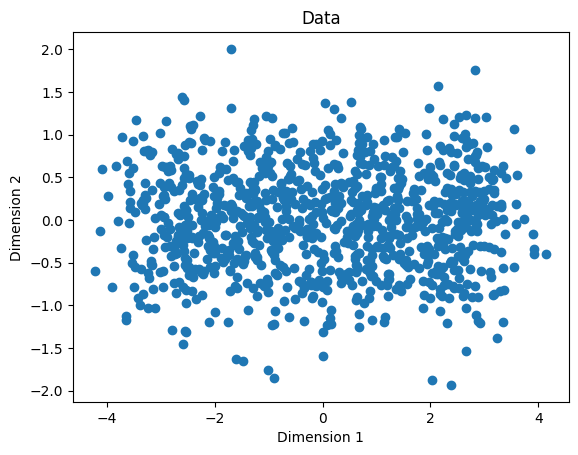

In [7]:
# data exploration complete
# Your code to create a clustering solution continues here
# import libraries for clustering algorithms
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()


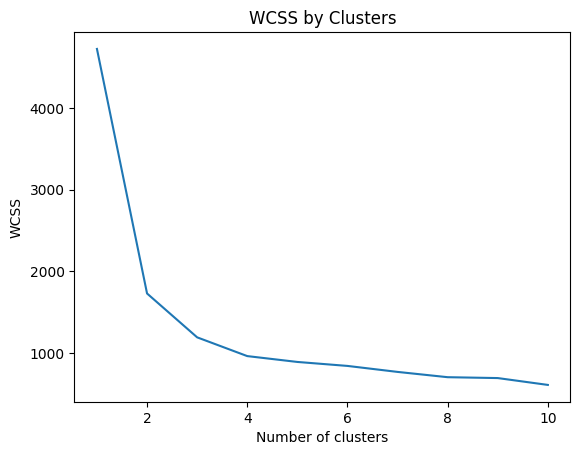

In [8]:
# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# Create a model based on number of centroids
nc=4  # number of clusters
# model = KMeans(n_clusters=nc, init='k-means++', n_init=100, max_iter=1000)
model = KMeans(n_clusters=nc, init='random', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([3, 3, 1, 1, 3, 3, 1, 0, 3, 3, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0,
       3, 3, 0, 2, 1, 3, 2, 0, 2, 3, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 1, 2,
       1, 3, 3, 1, 1, 0, 3, 2, 1, 1, 1, 1, 0, 3, 1, 3, 3, 3, 3, 3, 0, 0,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 3, 2, 0, 2, 1, 2, 0, 1, 2, 0,
       0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 0, 0, 1,
       0, 2, 3, 3, 2, 1, 2, 1, 3, 2, 0, 2, 1, 1, 3, 0, 2, 0, 1, 3, 2, 2,
       2, 0, 2, 2, 0, 3, 0, 2, 3, 2, 2, 3, 1, 1, 0, 1, 0, 0, 1, 3, 3, 0,
       3, 2, 3, 0, 0, 0, 2, 3, 1, 1, 0, 2, 2, 3, 3, 1, 3, 2, 0, 1, 0, 2,
       2, 0, 0, 3, 0, 3, 2, 2, 0, 1, 3, 1, 1, 2, 2, 3, 2, 0, 1, 2, 0, 0,
       3, 1, 2, 1, 1, 1, 3, 3, 1, 0, 1, 3, 1, 1, 2, 3, 1, 0, 0, 1, 3, 1,
       0, 3, 2, 1, 2, 0, 2, 3, 2, 3, 0, 3, 2, 0, 3, 1, 1, 3, 1, 2, 1, 2,
       1, 0, 0, 2, 1, 3, 3, 0, 1, 0, 2, 2, 1, 1, 1, 3, 1, 3, 0, 1, 1, 0,
       3, 0, 2, 2, 2, 0, 1, 3, 0, 2, 3, 2, 1, 0, 0, 3, 1, 1, 2, 3, 3, 1,
       1, 2, 1, 3, 3, 2, 3, 1, 1, 1, 0, 0, 2, 3, 1,

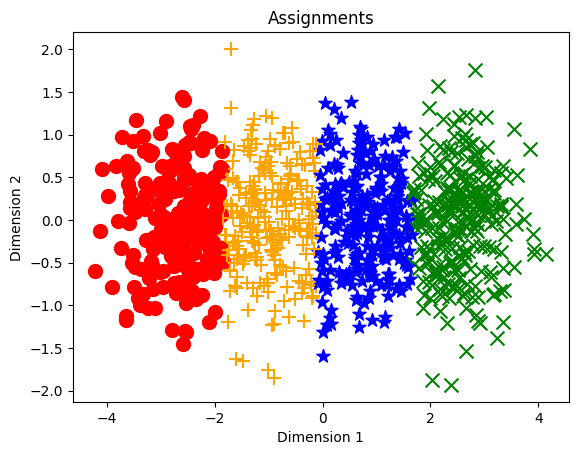

In [23]:
# plot the clusters by k-means
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange', 3:'red'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'o'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100) # s is size
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [24]:
# agglomerative clustering collects data points and forms a hierarchical tree of clusters 
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=nc, linkage='ward')
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 1, 3, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2, 1, 2, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 1, 2, 3, 2, 0, 1, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0,
       2, 1, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 2, 3, 2, 3,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2,

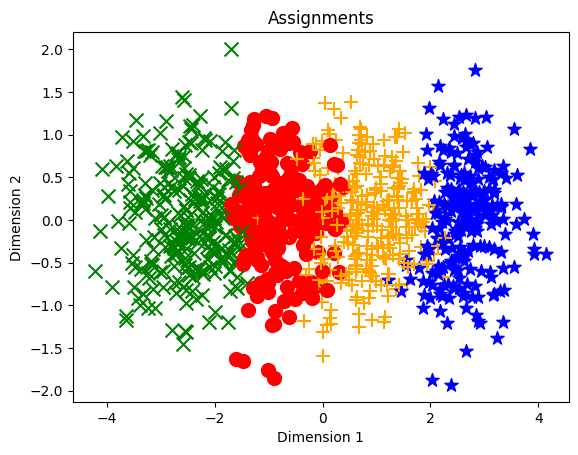

In [25]:
# plot the clusters by agglomerative clustering
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange', 3:'red'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'o'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100) # s is size
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, agg_clusters)
